# Import the Required Libraries

In [141]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

<h1>1. Import the Dataset</h1>

In [142]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [143]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [144]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


<h1>2. Dataset Description</h1>

In [145]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<table>
<thead><tr>
<th>Attribute</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>Age</strong></td>
<td>Age of a patient [years]</td>
</tr>
<tr>
<td><strong>Sex</strong></td>
<td>Gender of the patient [M: Male, F: Female]</td>
</tr>
<tr>
<td><strong>ChestPain</strong></td>
<td>chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</td>
</tr>
<tr>
<td><strong>RestingBP</strong></td>
<td>Blood pressure in Hg (Normal blood pressure - 120/80 Hg)</td>
</tr>
<tr>
<td><strong>Cholesterol</strong></td>
<td>Serum cholestrol level in blood (Normal cholesterol level below for adults 200mg/dL)</td>
</tr>
<tr>
<td><strong>FastingBS</strong></td>
<td>Fasting Blood Sugar (Normal less than 100mg/dL for non diabetes for diabetes 100-125mg/dL)</td>
</tr>
<tr>
<td><strong>RestingECG</strong></td>
<td>resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of &gt; 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</td>
</tr>
<tr>
<td><strong>MaxHR</strong></td>
<td>maximum heart rate achieved [Numeric value between 60 and 202]</td>
</tr>
<tr>
<td><strong>ExerciseAngina</strong></td>
<td>exercise-induced angina [Y: Yes, N: No]</td>
</tr>
<tr>
<td><strong>Oldpeak</strong></td>
<td>oldpeak = ST [Numeric value measured in depression]</td>
</tr>
<tr>
<td><strong>ST_Slope</strong></td>
<td>the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</td>
</tr>
<tr>
<td><strong>HeartDisease</strong></td>
<td>output class [1: heart disease, 0: Normal]</td>
</tr>
</tbody>
</table>

In [146]:
df.info() #short info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [147]:
df.shape

(918, 12)

In [148]:
df.size

11016

In [149]:
#find unique value
df.apply(lambda x: len(x.unique()))

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [150]:
df.isnull().sum() #checking the null values present in the DataFrame

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [151]:
df.nunique() #unique values found in the DataFrame of each column

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [152]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [153]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [154]:
df.duplicated().sum()

0

In [155]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [156]:
df.skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

<h1>3. Exploratory Data Analysis</h1>

[]

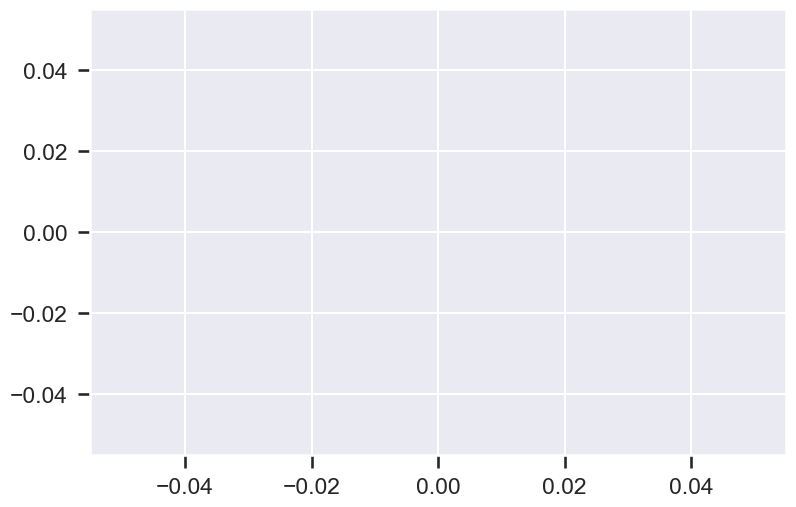

In [157]:
plt.plot()

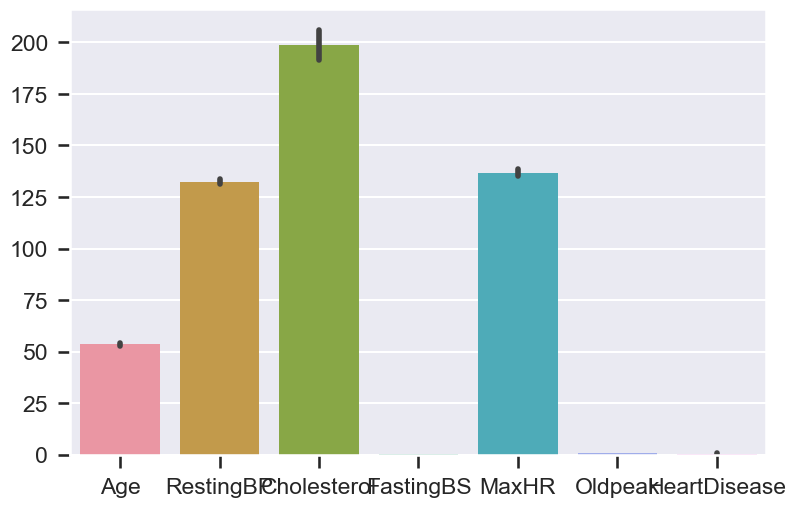

In [158]:
res=sns.barplot(df)

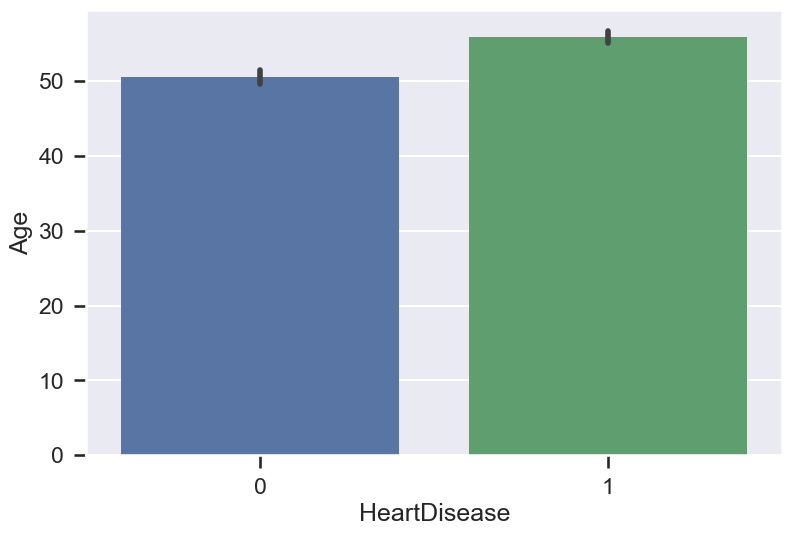

In [159]:
res=sns.barplot(df,x='HeartDisease',y='Age')

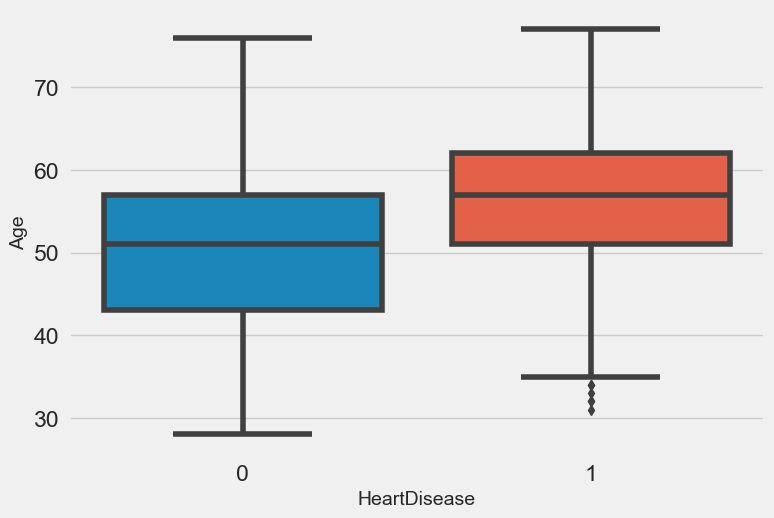

In [161]:
res=sns.boxplot(df,x='HeartDisease',y='Age')

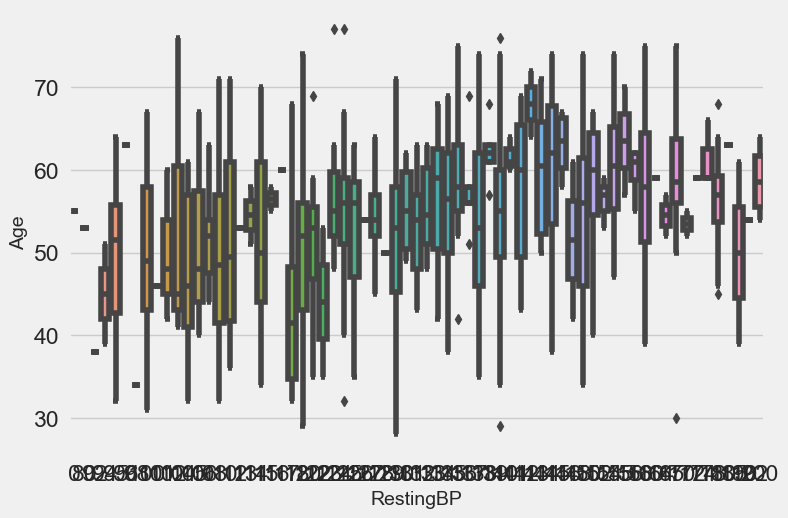

In [164]:
res=sns.boxplot(df,x='RestingBP',y='Age')

<Axes: xlabel='RestingBP', ylabel='Density'>

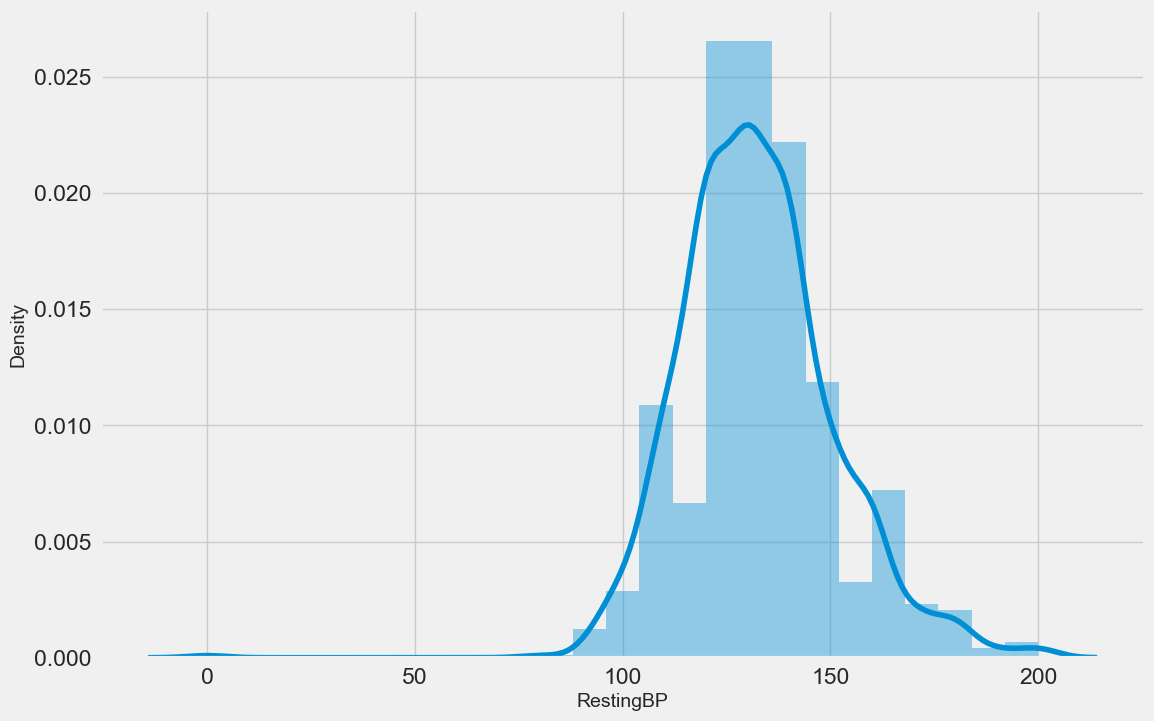

In [160]:
#Dist plot for RestingBP
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.distplot(df['RestingBP'], bins=25)

<Axes: xlabel='Sex', ylabel='count'>

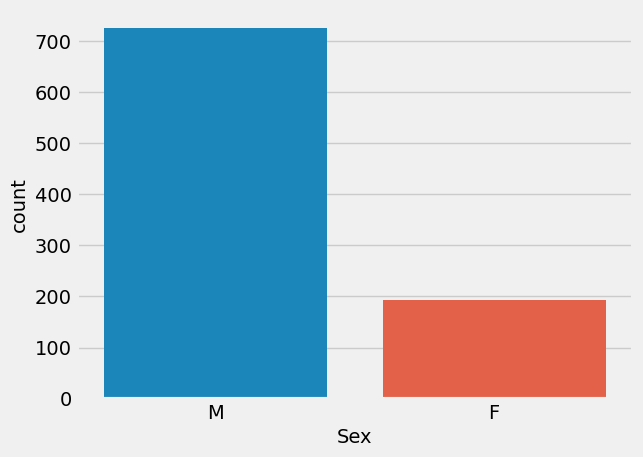

In [21]:
#Distribution of numerical variable
sns.countplot(data=df, x='Sex')

<Axes: xlabel='Age', ylabel='count'>

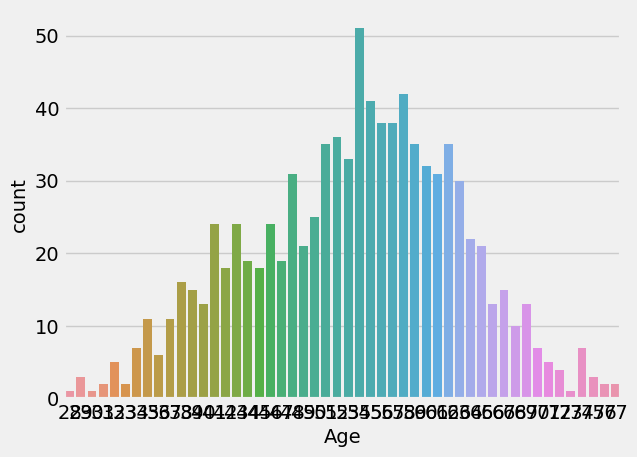

In [22]:
sns.countplot(data=df, x='Age')

<Axes: xlabel='FastingBS', ylabel='count'>

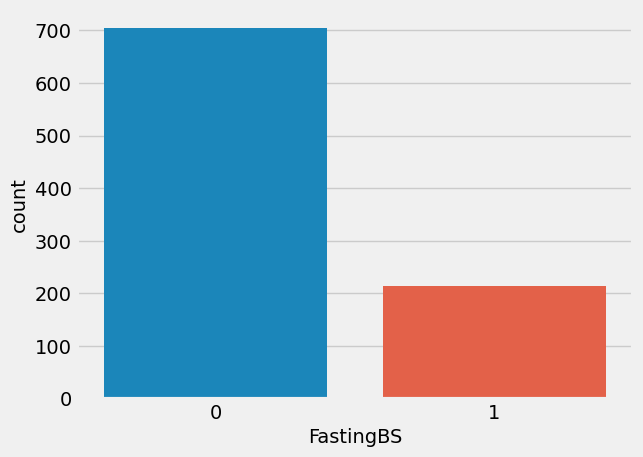

In [20]:
sns.countplot(data=df, x='FastingBS')

<Axes: xlabel='MaxHR', ylabel='count'>

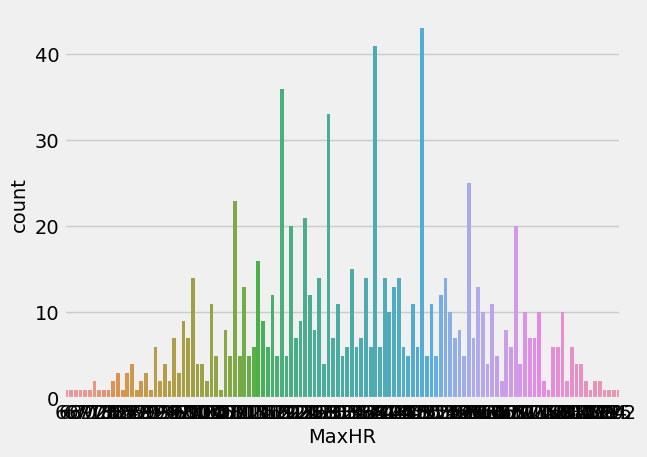

In [23]:
sns.countplot(data=df, x='MaxHR')

<Axes: xlabel='HeartDisease', ylabel='count'>

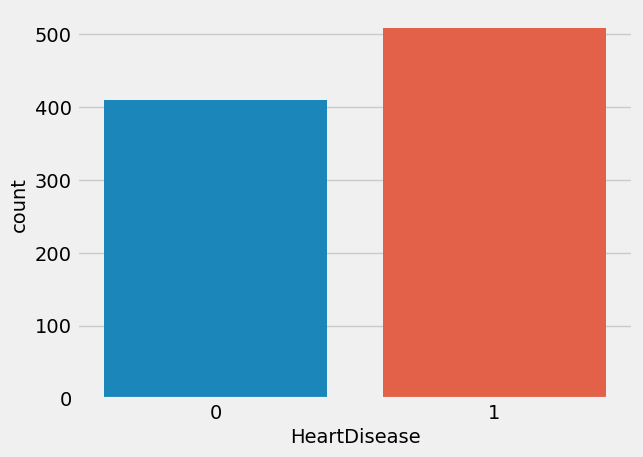

In [23]:
sns.countplot(data=df, x='HeartDisease')

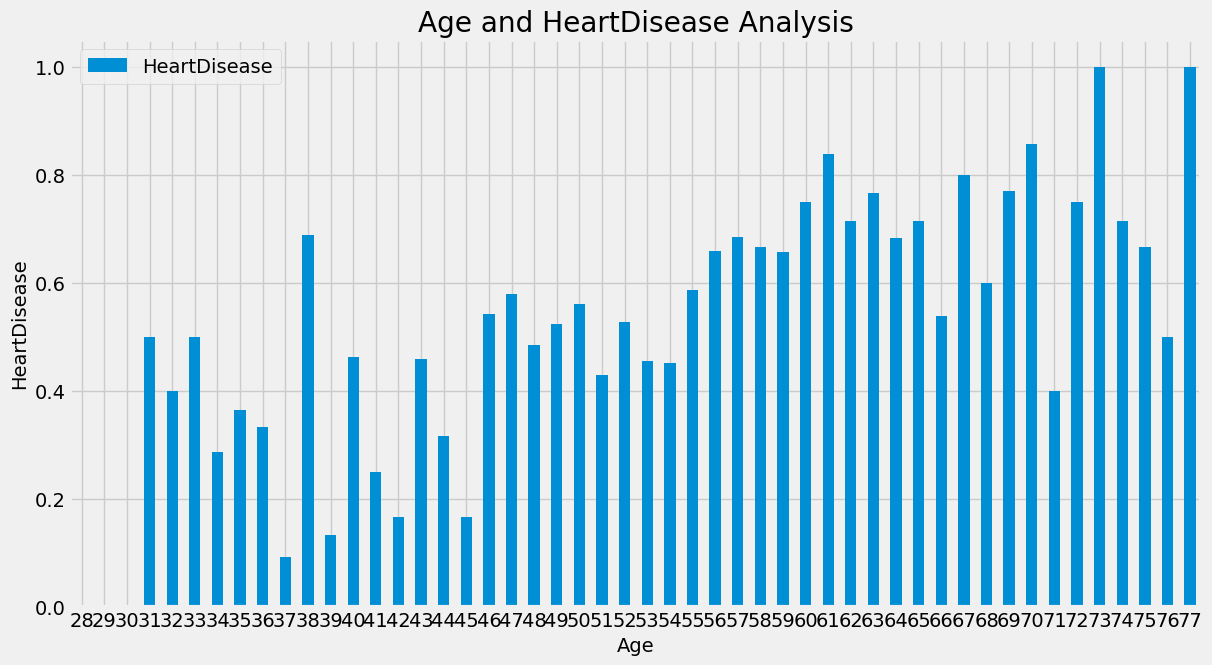

In [24]:
#bivariate analysis
age_plot = df.pivot_table(index='Age', values='HeartDisease', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("HeartDisease")
plt.title("Age and HeartDisease Analysis")
plt.xticks(rotation=0)
plt.show()

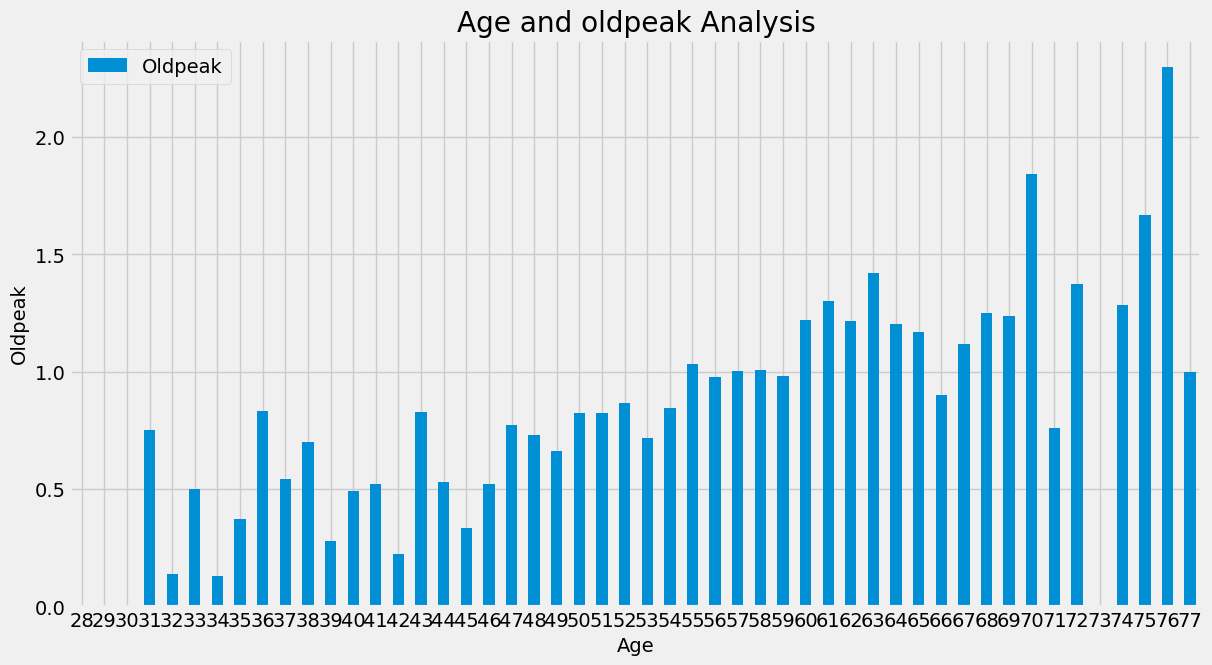

In [25]:
old_plot = df.pivot_table(index='Age', values='Oldpeak', aggfunc=np.mean)
old_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Oldpeak")
plt.title("Age and oldpeak Analysis")
plt.xticks(rotation=0)
plt.show()

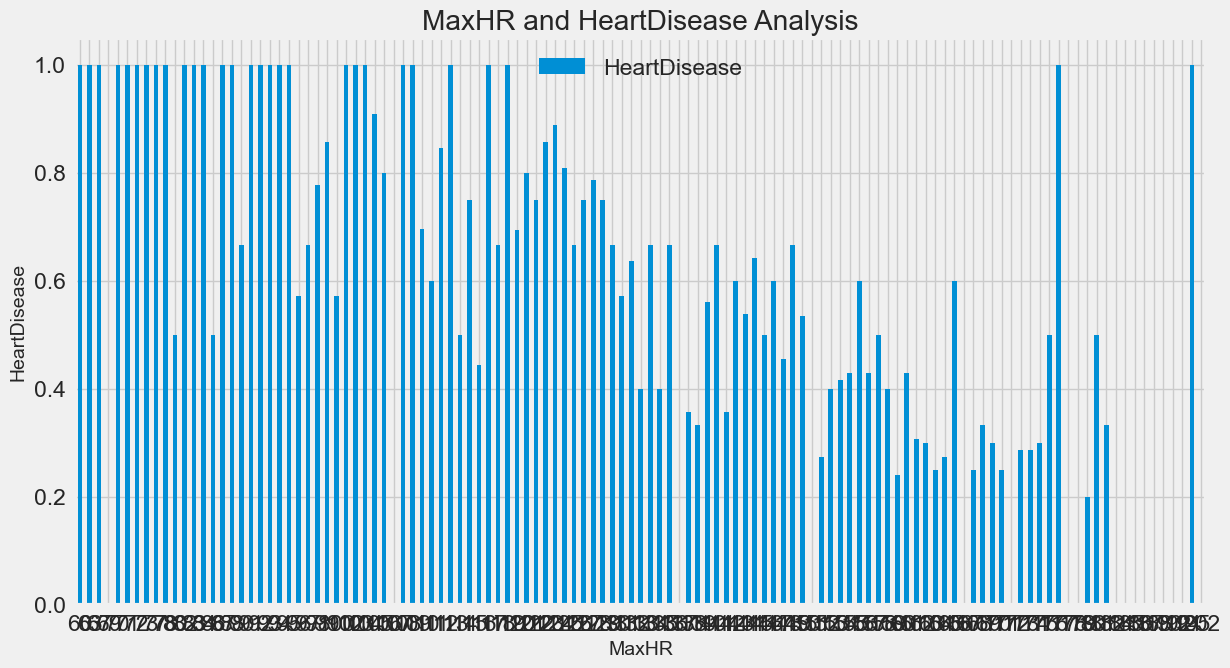

In [165]:
MaxHR_plot = df.pivot_table(index='MaxHR', values='HeartDisease', aggfunc=np.mean)
MaxHR_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('MaxHR')
plt.ylabel("HeartDisease")
plt.title("MaxHR and HeartDisease Analysis")
plt.xticks(rotation=0)
plt.show()

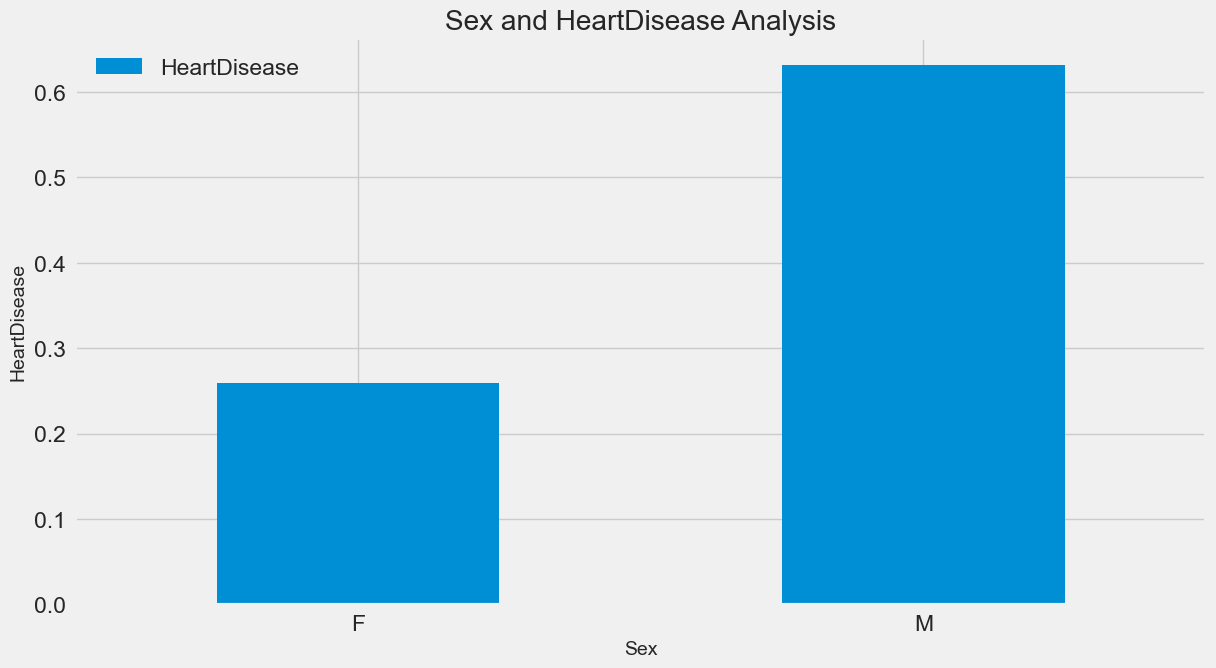

In [166]:
Sex_plot = df.pivot_table(index='Sex', values='HeartDisease', aggfunc=np.mean)
Sex_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Sex')
plt.ylabel("HeartDisease")
plt.title("Sex and HeartDisease Analysis")
plt.xticks(rotation=0)
plt.show()

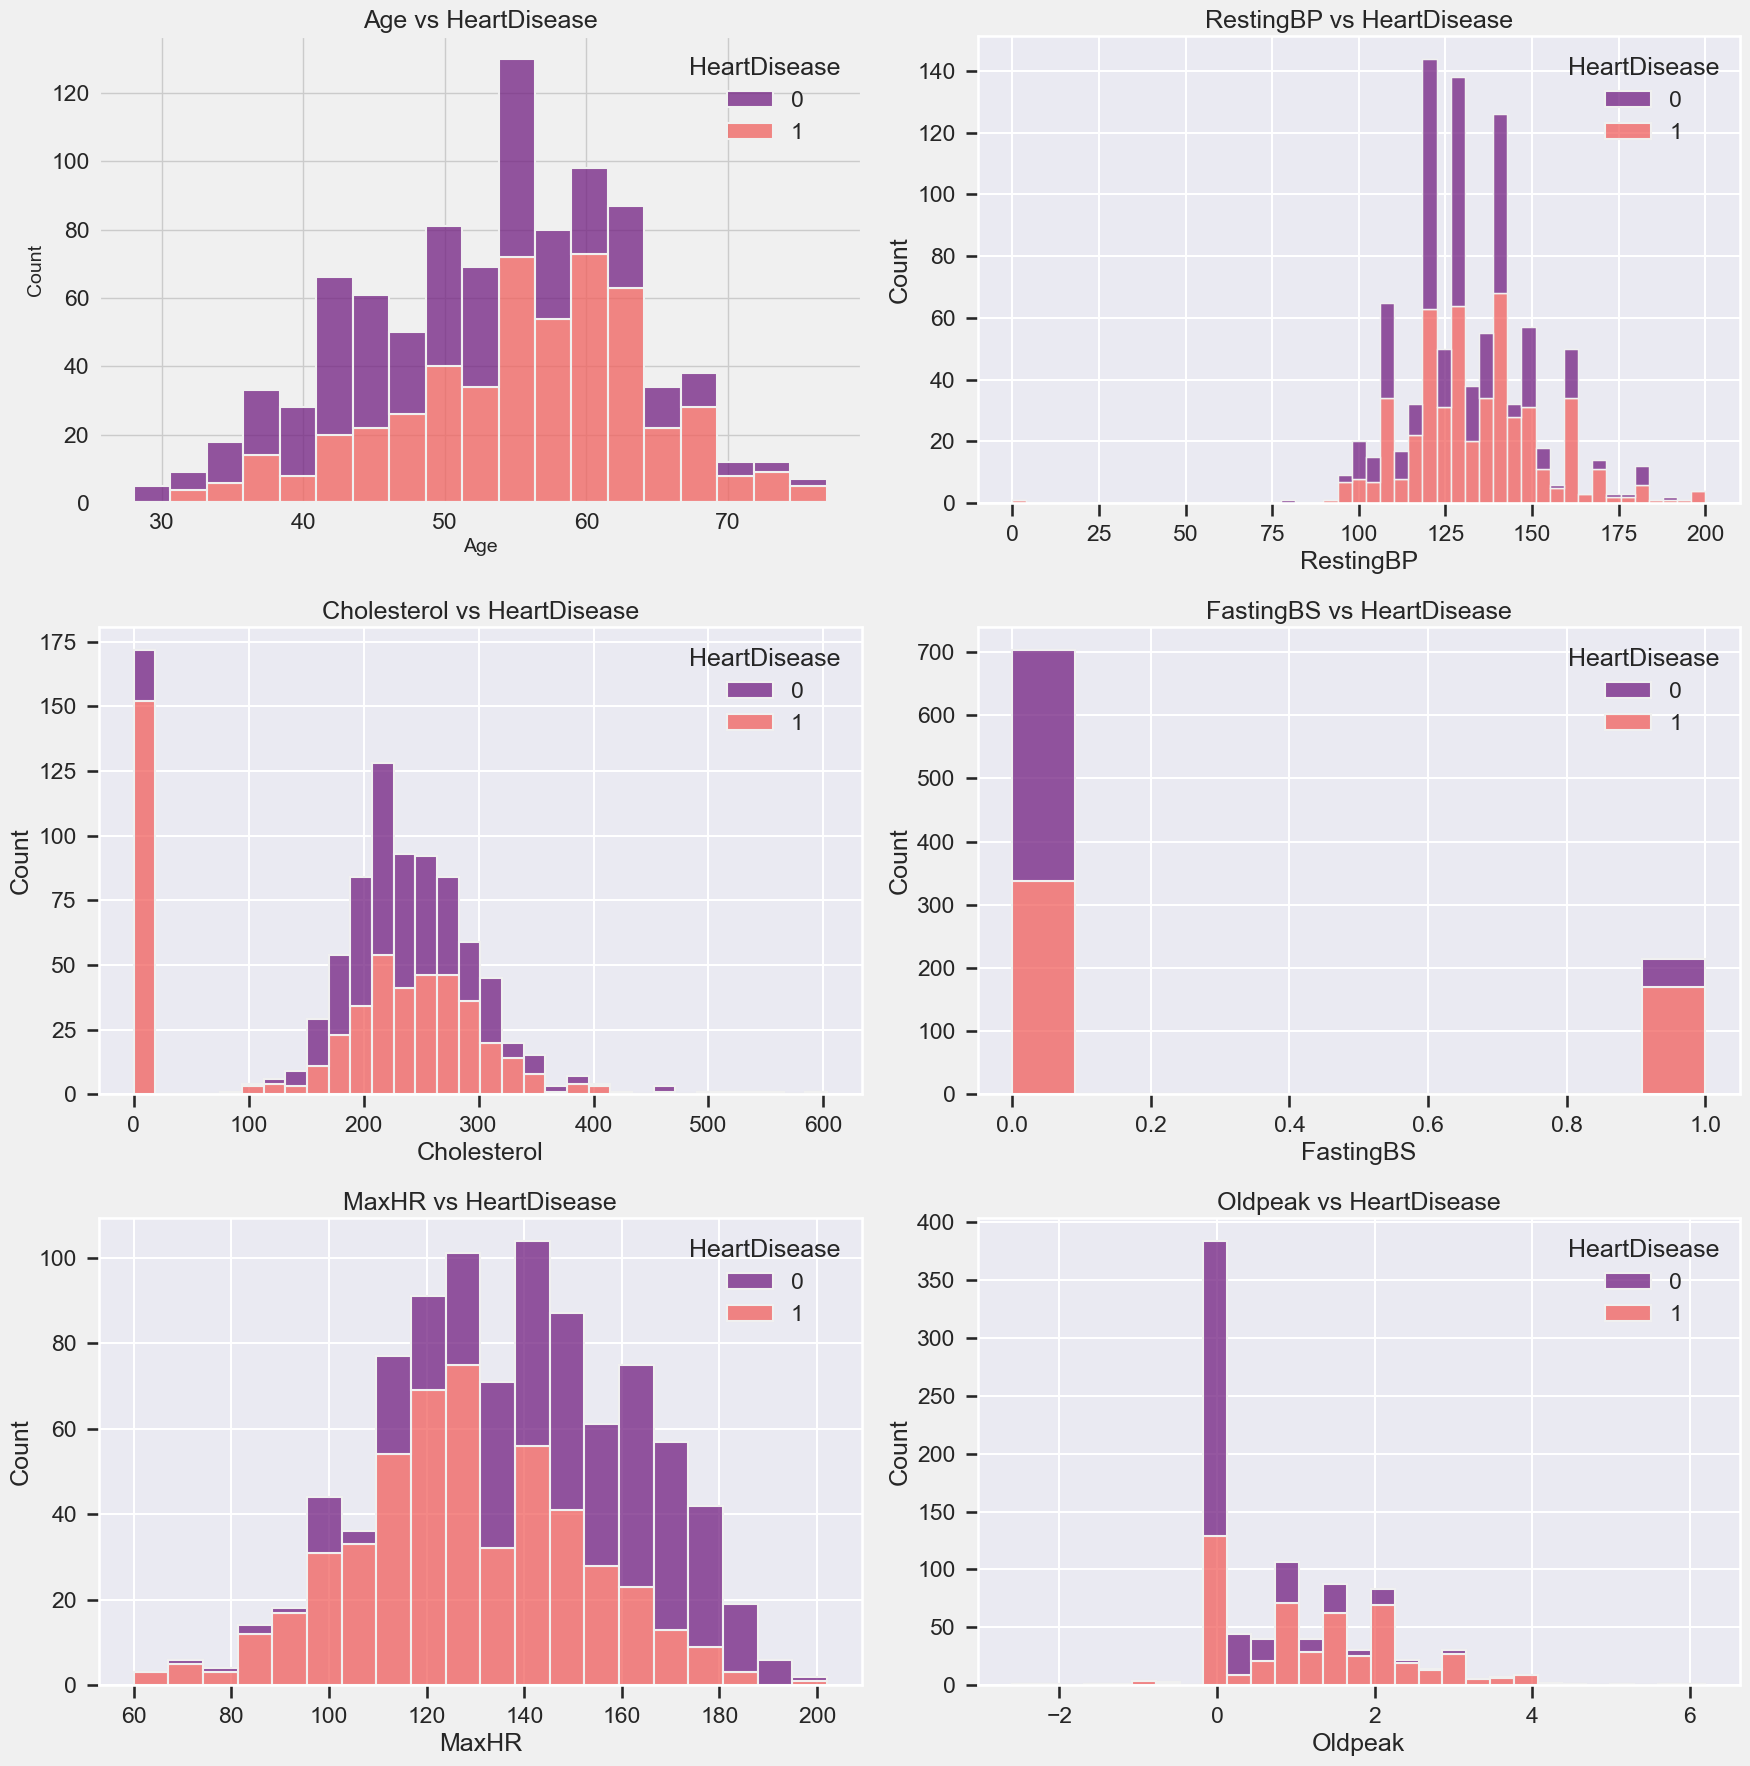

In [167]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Age', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='RestingBP', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Cholesterol', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='FastingBS', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='MaxHR', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Oldpeak', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Oldpeak vs HeartDisease')
plt.show()

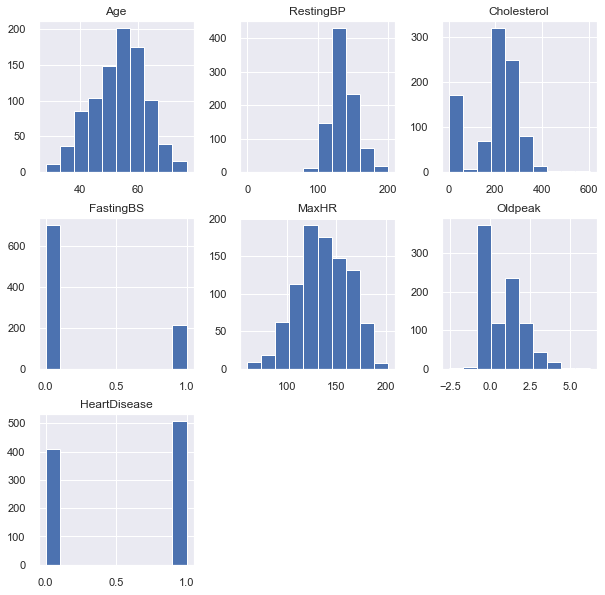

In [19]:
#g = sns.FacetGrid(tips, col="time")
#g.map(sns.histplot, "tip")
sns.set()
df.hist(figsize=(10,10))
plt.show()

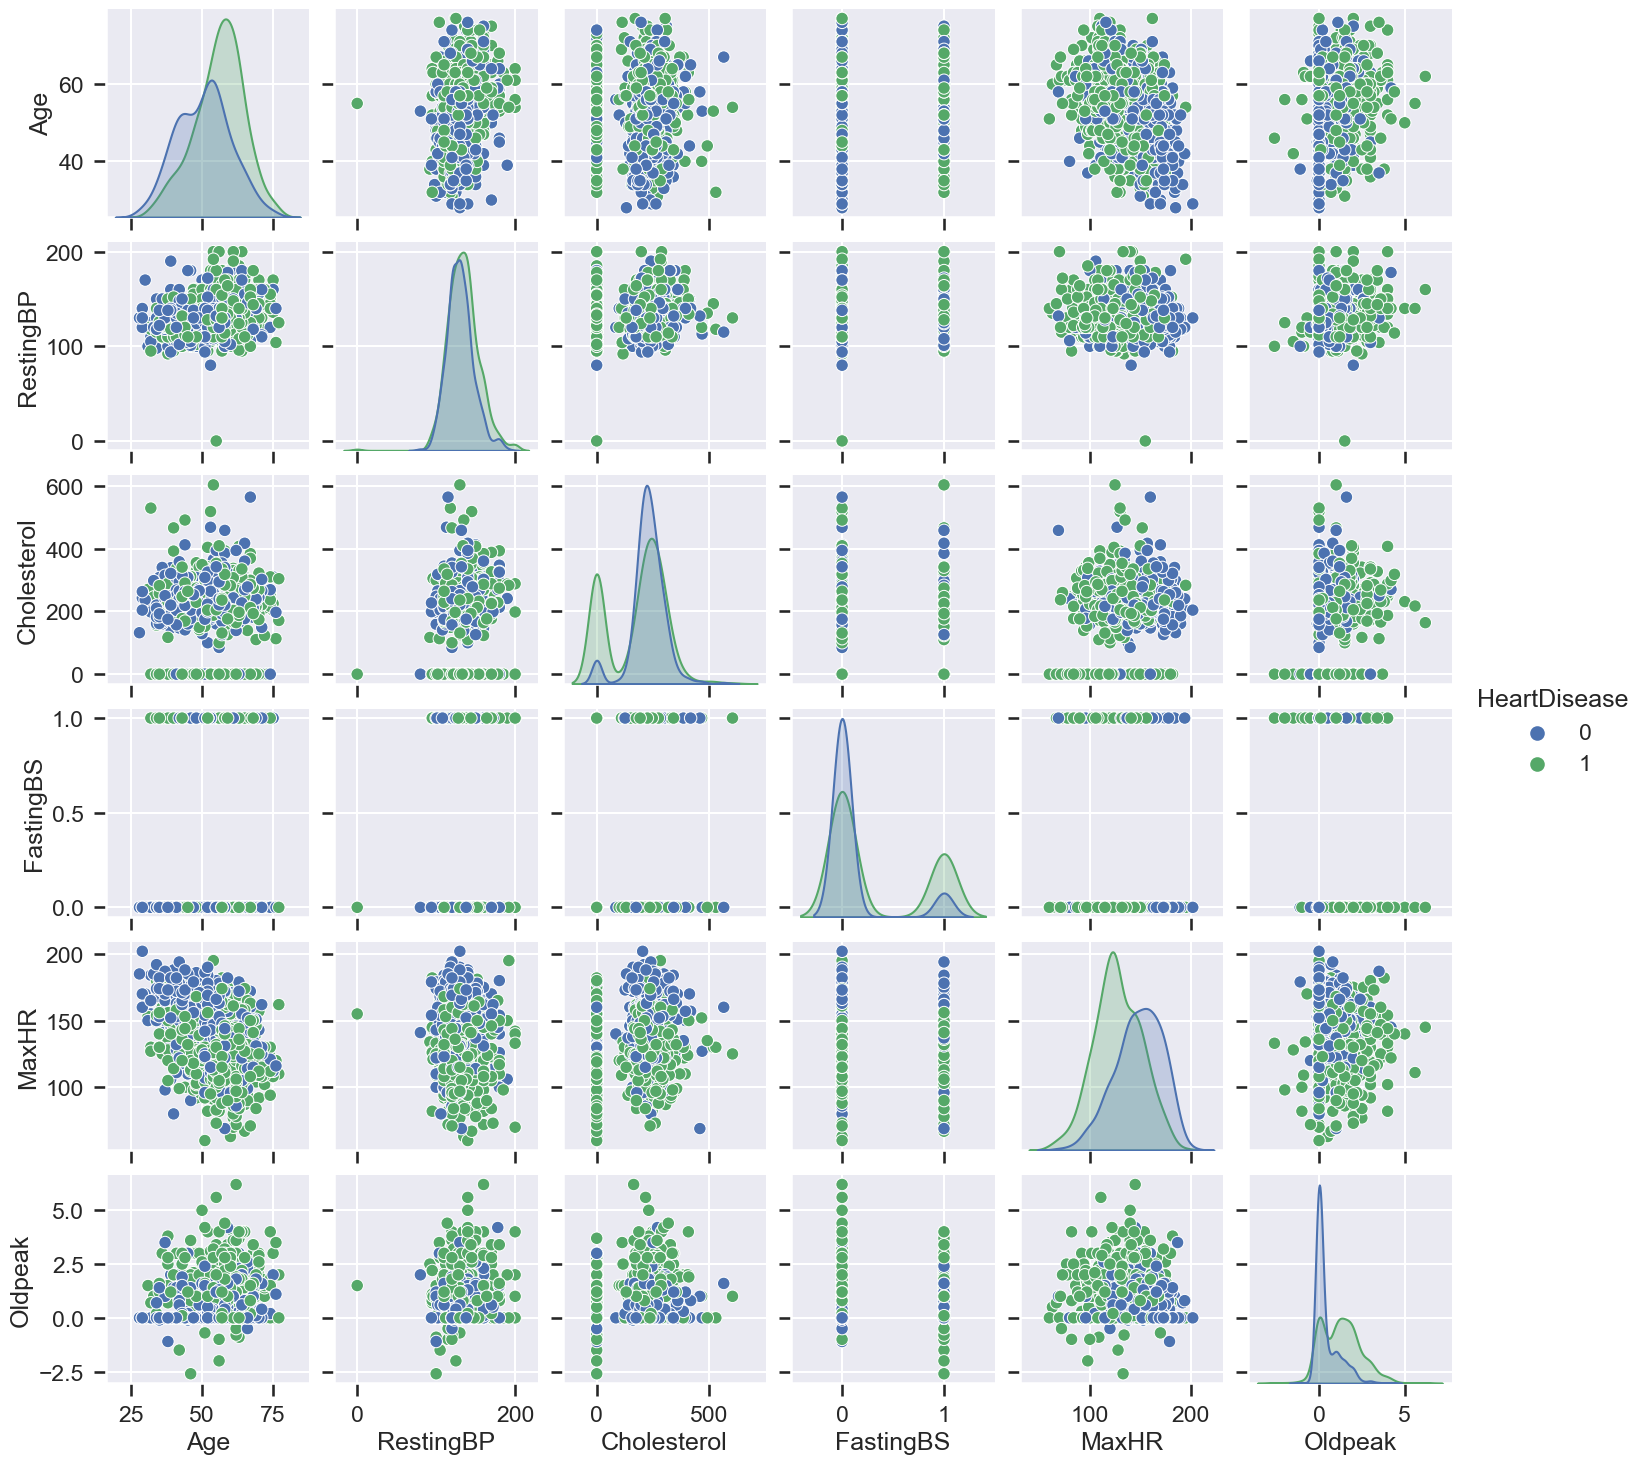

In [168]:
sns.pairplot(df,hue='HeartDisease')

In [169]:
dff= df.groupby('Sex').agg({'Age' : 'mean', "ChestPainType":'count','RestingBP':'mean','Cholesterol':'mean',
                            'FastingBS':'sum','RestingECG':'count','MaxHR':'mean','ExerciseAngina':'count','Oldpeak':'mean',
                            'ST_Slope':'count','HeartDisease':'sum'})
dff
# average age is same for both male and female

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Sex,,,,,,,,,,,
F,52.492228,193,132.212435,241.196891,26,193,146.139896,193,0.668912,193,50
M,53.782069,725,132.445517,187.513103,188,725,134.325517,725,0.945517,725,458


In [50]:
import plotly.express as px
px.bar(data_frame=dff, barmode='group', title = "Gender wise Analyzing",template="plotly_dark")

<h1>4. Data Preprocessing</h1>

In [51]:
#Check for null values
dff.isnull().sum()

Age               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [170]:
# to improve the metric use one hot encoding
# label encoding
cols = ['Sex', 'MaxHR', 'HeartDisease']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,98,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,82,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,25,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,34,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,48,N,0.0,Up,0


# Corelation Matrix

<Axes: >

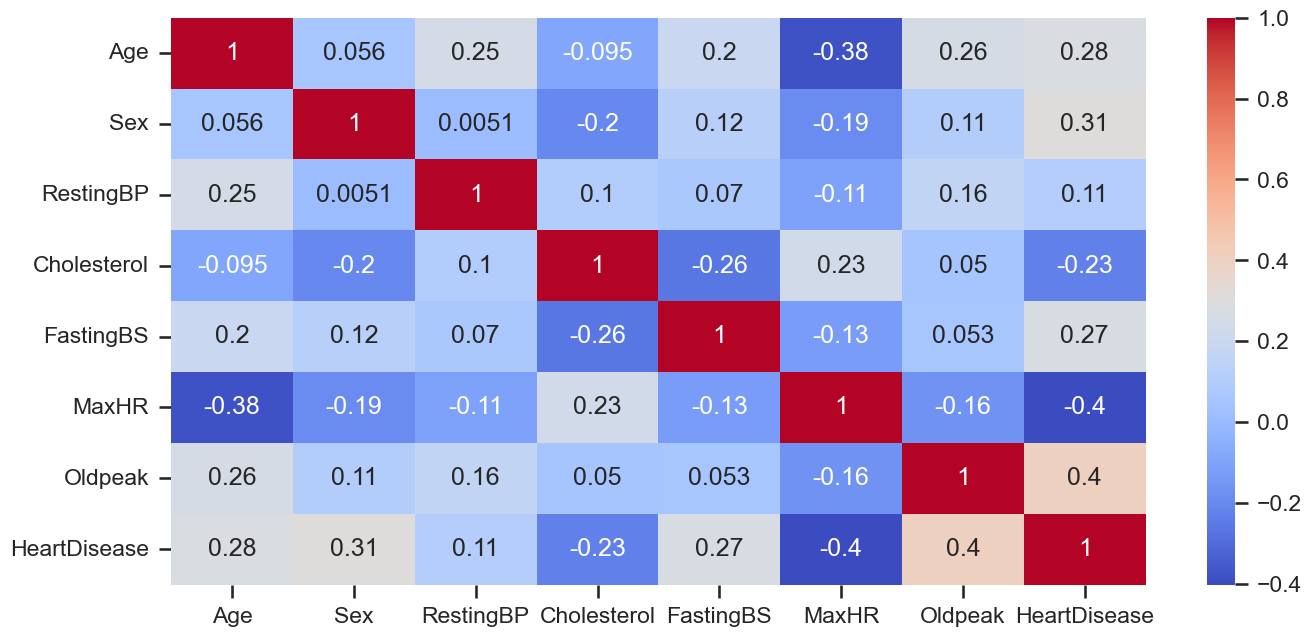

In [171]:
corr = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [172]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,98,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,82,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,25,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,34,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,48,N,0.0,Up,0


In [173]:
X = df.drop(columns=['ExerciseAngina', 'FastingBS', 'ST_Slope'])
y = df['ST_Slope']

In [174]:
print('Mean: ',df['Cholesterol'].mean())
print('Median: ',df['Cholesterol'].median())

Mean:  198.7995642701525
Median:  223.0


In [175]:
mc=df[df['Cholesterol']>0].Cholesterol.mean() #mean value of Cholesterol without including the cholesterol=0
print('Mean of Cholesterol>0: ',mc)

Mean of Cholesterol>0:  244.6353887399464


In [176]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,62.979303,24.919644,0.0,46.00,64.0,82.0,118.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


<h2>4.1 One Hot Encoding</h2>

In [66]:
df.describe().columns.to_list()

['Age',
 'Sex',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

<h3>5. Feature Scaling</h3>

In [70]:
# altering the DataFrame
df = df[['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex',
 'HeartDisease',]]
 
# printing the altered DataFrame
df.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,HeartDisease
0,40,140,289,0,98,0.0,1,0
1,49,160,180,0,82,1.0,0,1
2,37,130,283,0,25,0.0,1,0
3,48,138,214,0,34,1.5,0,1
4,54,150,195,0,48,0.0,1,0


In [71]:
scaler = StandardScaler()
scaler.fit(df.drop('HeartDisease',axis = 1))

StandardScaler()

In [73]:
scaled_features = scaler.transform(df.drop('HeartDisease',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex
0,-1.433140,0.410909,0.825070,-0.551341,1.406111,-0.832432,0.515952
1,-0.478484,1.491752,-0.171961,-0.551341,0.763697,0.105664,-1.938163
2,-1.751359,-0.129513,0.770188,-0.551341,-1.524902,-0.832432,0.515952
3,-0.584556,0.302825,0.139040,-0.551341,-1.163544,0.574711,-1.938163
4,0.051881,0.951331,-0.034755,-0.551341,-0.601432,-0.832432,0.515952


In [74]:
df.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,HeartDisease
0,40,140,289,0,98,0.0,1,0
1,49,160,180,0,82,1.0,0,1
2,37,130,283,0,25,0.0,1,0
3,48,138,214,0,34,1.5,0,1
4,54,150,195,0,48,0.0,1,0


<h1>6.Feature Selection</h1>

In [75]:
col=df.describe().columns.to_list()
print(col)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex', 'HeartDisease']


feature = pd.Series(forest.feature_importances_, index =).sort_values(ascending = False)
print(feature)

In [77]:
X = df_feat
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)
print(X, y)

          Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak       Sex
0   -1.433140   0.410909     0.825070  -0.551341  1.406111 -0.832432  0.515952
1   -0.478484   1.491752    -0.171961  -0.551341  0.763697  0.105664 -1.938163
2   -1.751359  -0.129513     0.770188  -0.551341 -1.524902 -0.832432  0.515952
3   -0.584556   0.302825     0.139040  -0.551341 -1.163544  0.574711 -1.938163
4    0.051881   0.951331    -0.034755  -0.551341 -0.601432 -0.832432  0.515952
..        ...        ...          ...        ...       ...       ...       ...
913 -0.902775  -1.210356     0.596393  -0.551341 -0.199923  0.293283  0.515952
914  1.536902   0.627078    -0.053049   1.813758  0.161434  2.357094  0.515952
915  0.370100  -0.129513    -0.620168  -0.551341 -0.882488  0.293283  0.515952
916  0.370100  -0.129513     0.340275  -0.551341  1.486413 -0.832432 -1.938163
917 -1.645286   0.302825    -0.217696  -0.551341  1.446262 -0.832432  0.515952

[918 rows x 7 columns] 0      0
1      1
2      0
3

<h1>7.Model Selection</h1>

<h2>10-Fold Cross validation and model comparision</h2>

In [177]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
cv = KFold(n_splits=10, random_state=100, shuffle=True)
model = KNeighborsClassifier(n_neighbors=36)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of KNN: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
model = SVC(kernel='rbf')
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of SVC: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
model=RandomForestClassifier(n_estimators =40,random_state=100)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of RandomForest: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kumku\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kumku\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
  File "C:\Users\kumku\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 454, in _fit
    X, y = self._validate_data(
  File "C:\Users\kumku\anaconda3\lib\site-packages\sklearn\base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\kumku\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\kumku\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\kumku\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\kumku\anaconda3\lib\site-packages\pandas\core\generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'ATA'

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kumku\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kumku\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
  File "C:\Users\kumku\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 454, in _fit
    X, y = self._validate_data(
  File "C:\Users\kumku\anaconda3\lib\site-packages\sklearn\base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\kumku\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\kumku\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\kumku\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\kumku\anaconda3\lib\site-packages\pandas\core\generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'NAP'


# <h2>K value estimation</h2>

In [83]:
from matplotlib import pyplot
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(i,np.mean(pred_i != y_test))

1 0.23043478260869565
2 0.2391304347826087
3 0.2217391304347826
4 0.21304347826086956
5 0.20434782608695654
6 0.19130434782608696
7 0.18695652173913044
8 0.2
9 0.2
10 0.18695652173913044
11 0.19130434782608696
12 0.18695652173913044
13 0.2
14 0.1956521739130435
15 0.2
16 0.19130434782608696
17 0.1956521739130435
18 0.1956521739130435
19 0.2
20 0.2
21 0.20869565217391303
22 0.2
23 0.21304347826086956
24 0.20434782608695654
25 0.1956521739130435
26 0.19130434782608696
27 0.20434782608695654
28 0.2
29 0.21304347826086956
30 0.2
31 0.20869565217391303
32 0.20434782608695654
33 0.21739130434782608
34 0.21304347826086956
35 0.21739130434782608
36 0.2217391304347826
37 0.2217391304347826
38 0.2217391304347826
39 0.21739130434782608


<h1>KNN model</h1>

              precision    recall  f1-score   support

           0       0.71      0.84      0.77        92
           1       0.88      0.77      0.82       138

    accuracy                           0.80       230
   macro avg       0.79      0.80      0.79       230
weighted avg       0.81      0.80      0.80       230

Confusion Matrix
[[ 77  15]
 [ 32 106]]


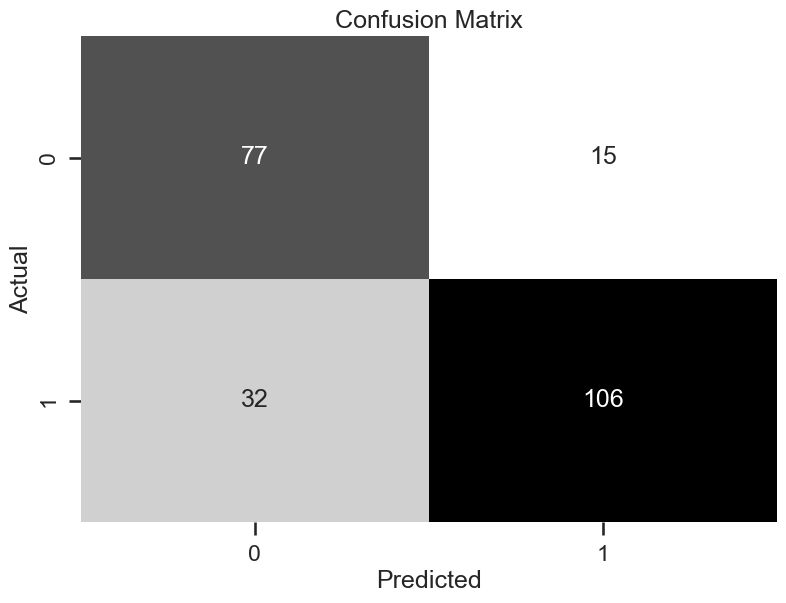

In [118]:
classifier = KNeighborsClassifier(n_neighbors=45)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
kn = confusion_matrix(y_test, y_pred)
print(kn)
plt.figure(figsize=(8, 6))
sns.heatmap(kn, annot=True, fmt="d", cmap="binary", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

# Support Vector Classifier

              precision    recall  f1-score   support

           0       0.72      0.84      0.77        92
           1       0.88      0.78      0.83       138

    accuracy                           0.80       230
   macro avg       0.80      0.81      0.80       230
weighted avg       0.81      0.80      0.81       230

Confusion Matrix
[[ 77  15]
 [ 30 108]]


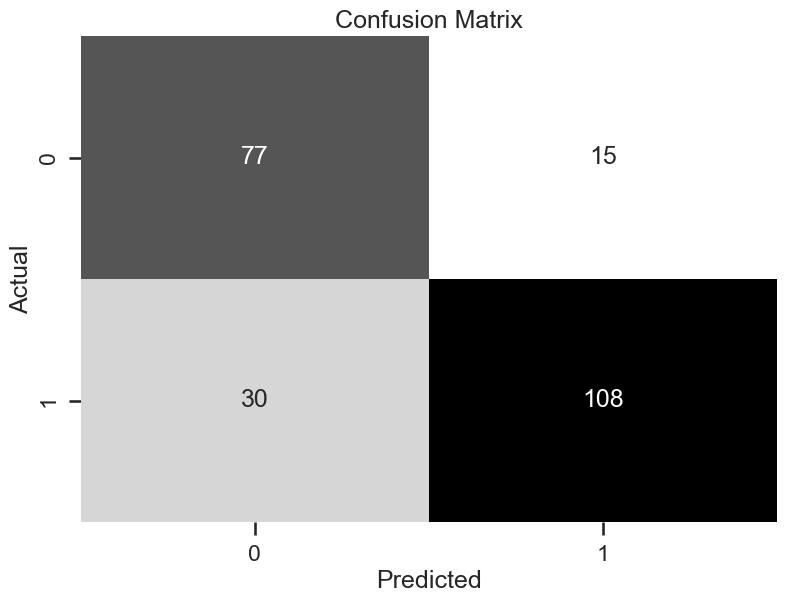

In [116]:
classifier = SVC(kernel='rbf', random_state=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
sp = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(sp, annot=True, fmt="d", cmap="binary", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

<h2>Parameter selectikon for Random Forest Classifier</h2>

In [94]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 103, stop = 300, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [95]:
rf = RandomForestClassifier()
forest = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
forest.fit(X_train,y_train)  

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [103, 124, 146, 168,
                                                         190, 212, 234, 256,
                                                         278, 300]},
                   random_state=42, verbose=2)

In [97]:
forest.best_params_

{'n_estimators': 256,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

# Random Forest Classifier

              precision    recall  f1-score   support

           0       0.70      0.71      0.70        92
           1       0.80      0.80      0.80       138

    accuracy                           0.76       230
   macro avg       0.75      0.75      0.75       230
weighted avg       0.76      0.76      0.76       230

Confusion Matrix
[[ 65  27]
 [ 28 110]]


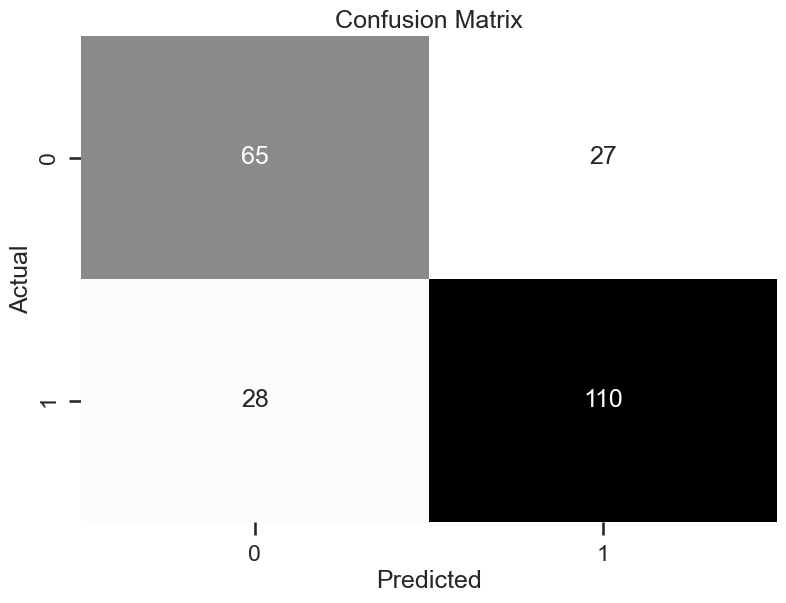

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
clf=RandomForestClassifier(n_estimators=124,min_samples_split= 2,
                           min_samples_leaf= 1,max_features='sqrt',max_depth=None, bootstrap=False)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
#print(confusion_matrix(y_test, y_pred))
kn = confusion_matrix(y_test, y_pred)
print(kn)
plt.figure(figsize=(8, 6))
sns.heatmap(kn, annot=True, fmt="d", cmap="binary", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

# Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        92
           1       0.84      0.85      0.84       138

    accuracy                           0.81       230
   macro avg       0.81      0.80      0.80       230
weighted avg       0.81      0.81      0.81       230

Confusion Matrix
[[ 70  22]
 [ 21 117]]


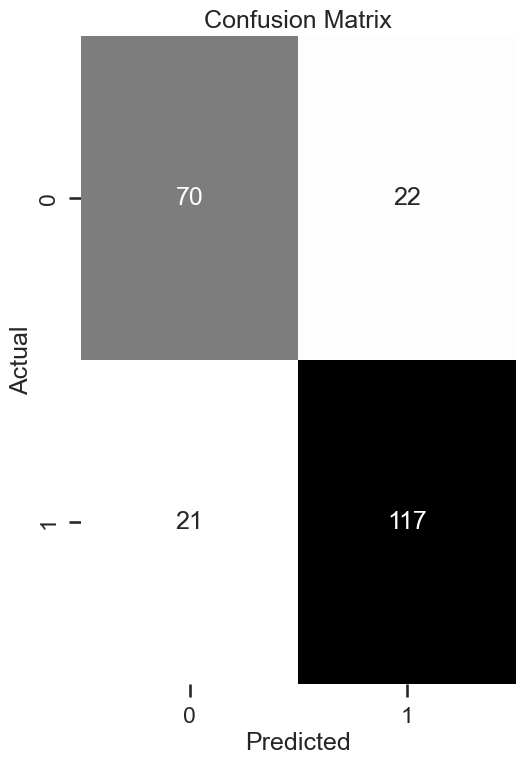

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
clff = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=1, random_state=23)
clff.fit(X_train, y_train)
y_pred=clff.predict(X_test)
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
#cl = confusion_matrix(y_test, y_pred)
#print(cl)
plt.figure(figsize=(5, 8)) 
sns.heatmap(cl, annot=True, fmt="d", cmap="binary", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

# Conclusion

    KNN model gives the accuracy of                   : 89%
    Random forest givea the accuracy of               : 89%
    Suport Vector Classifier gives the accuracy of    : 88%
    Gradient Boosting Classifier gives the accuracy of: 86%